In [215]:
import pandas as pd
import numpy as np
import fit_curves 
import warnings
from plotnine.exceptions import PlotnineWarning
from fit_curves import *

/workspace/workflow/_9GTDpreparation/fit_curves.py:72: OptimizeWarning: Covariance of the parameters could not be estimated


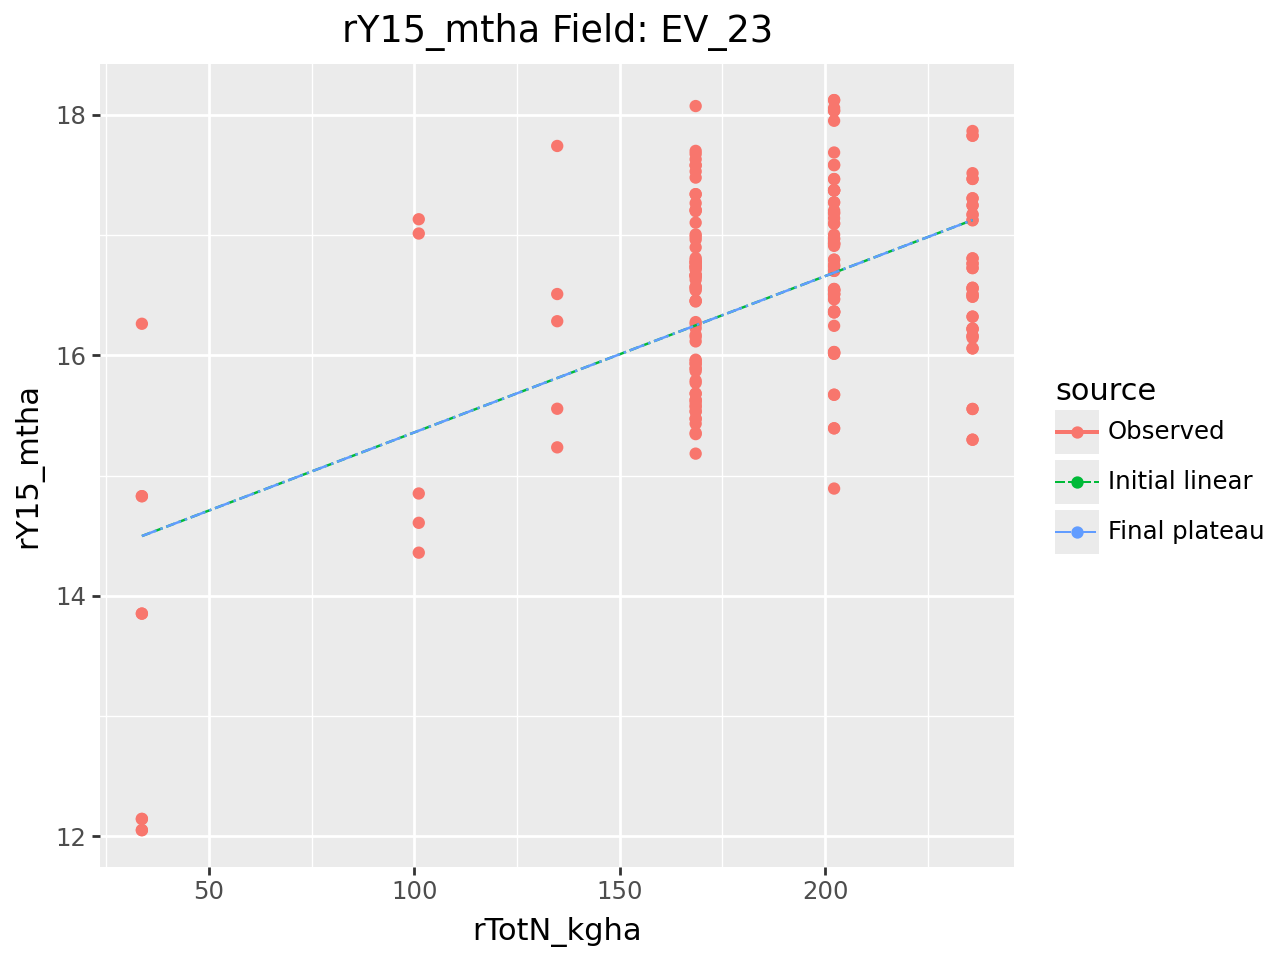

{'b0': np.float64(14.058249064821585), 'b1': np.float64(0.01300551677736125), 'x_break': np.float64(235.87295454545455), 'y_plateau': np.float64(17.12589873248826), 'r2': np.float64(0.3320495691718197), 'rmse': np.float64(0.8281251346753357), 'aic': np.float64(-68.68203884357418)}


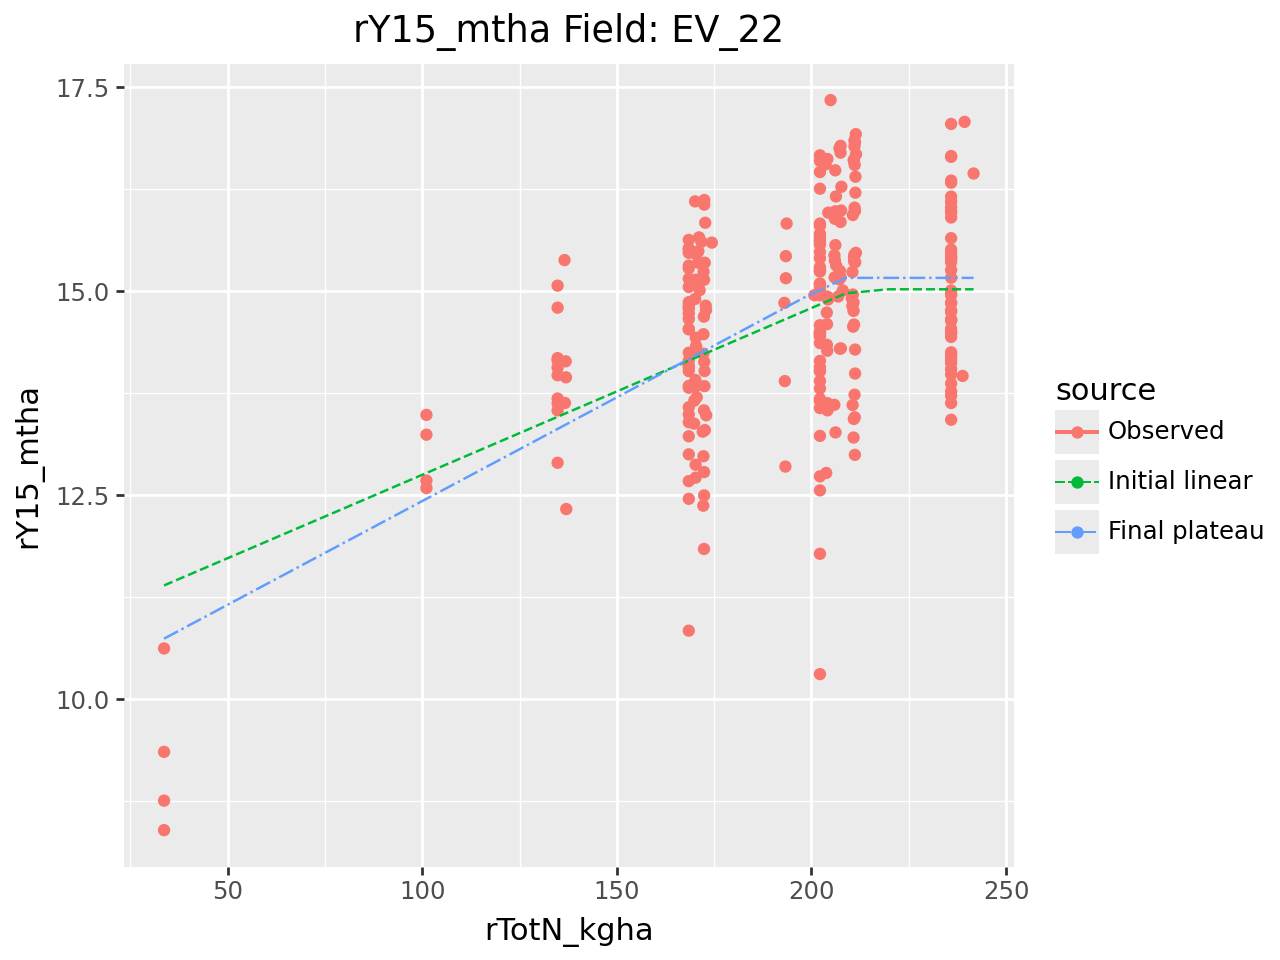

{'b0': np.float64(9.888723295418611), 'b1': np.float64(0.025419459991026648), 'x_break': np.float64(207.61298100182424), 'y_plateau': np.float64(15.166133159612258), 'r2': np.float64(0.3219622052465386), 'rmse': np.float64(1.1082753351786423), 'aic': np.float64(61.514729650515555)}


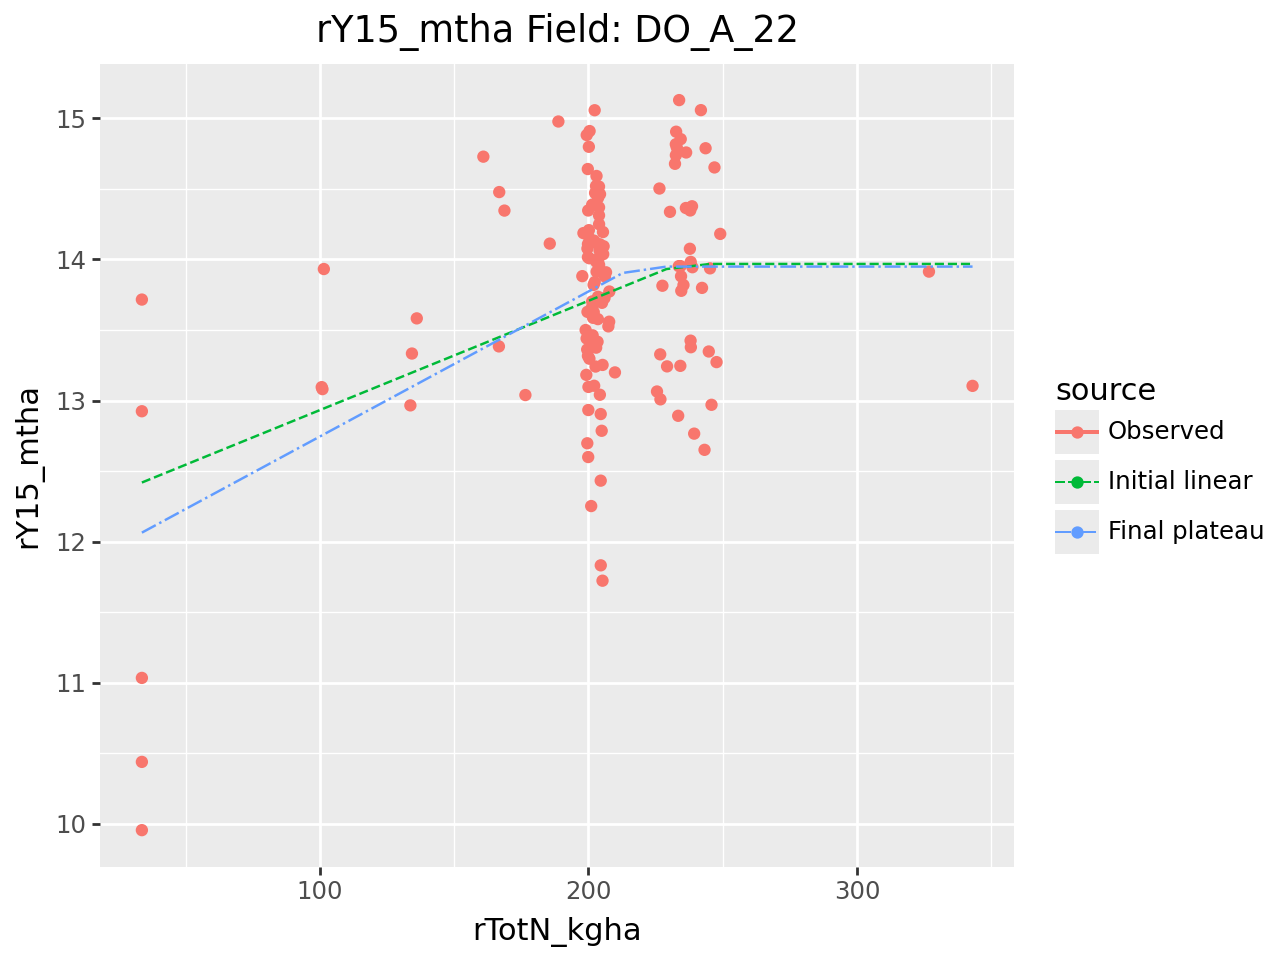

{'b0': np.float64(11.717228479855793), 'b1': np.float64(0.010280223948447664), 'x_break': np.float64(217.15455546910357), 'y_plateau': np.float64(13.949625941503779), 'r2': np.float64(0.2186033037157713), 'rmse': np.float64(0.7247936477769935), 'aic': np.float64(-85.41059390456681)}


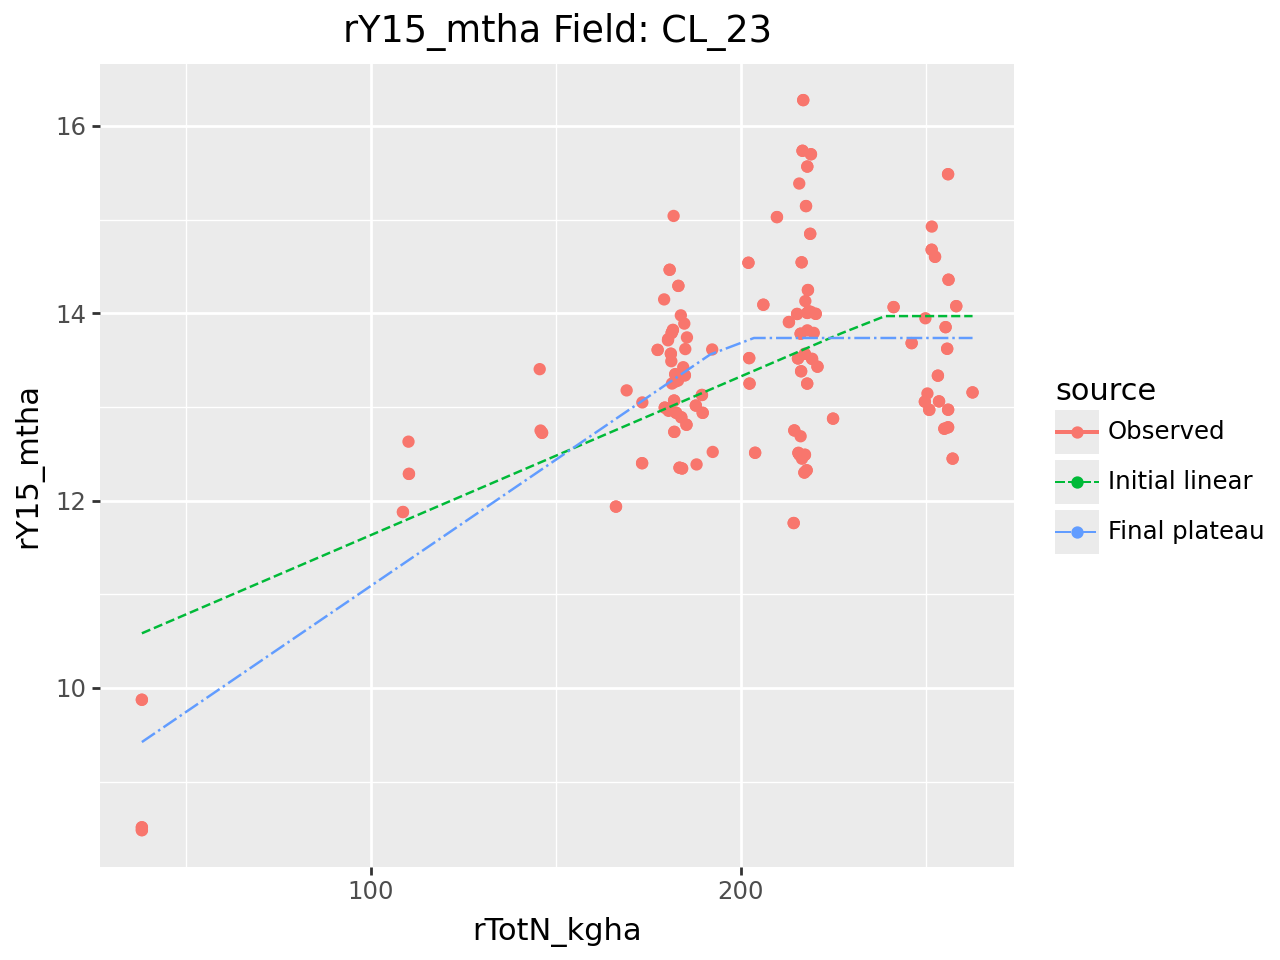

{'b0': np.float64(8.393766143322003), 'b1': np.float64(0.02693687958520835), 'x_break': np.float64(198.33512165307465), 'y_plateau': np.float64(13.736295432808525), 'r2': np.float64(0.4797921465509577), 'rmse': np.float64(0.8731617330700409), 'aic': np.float64(-46.083639956223664)}


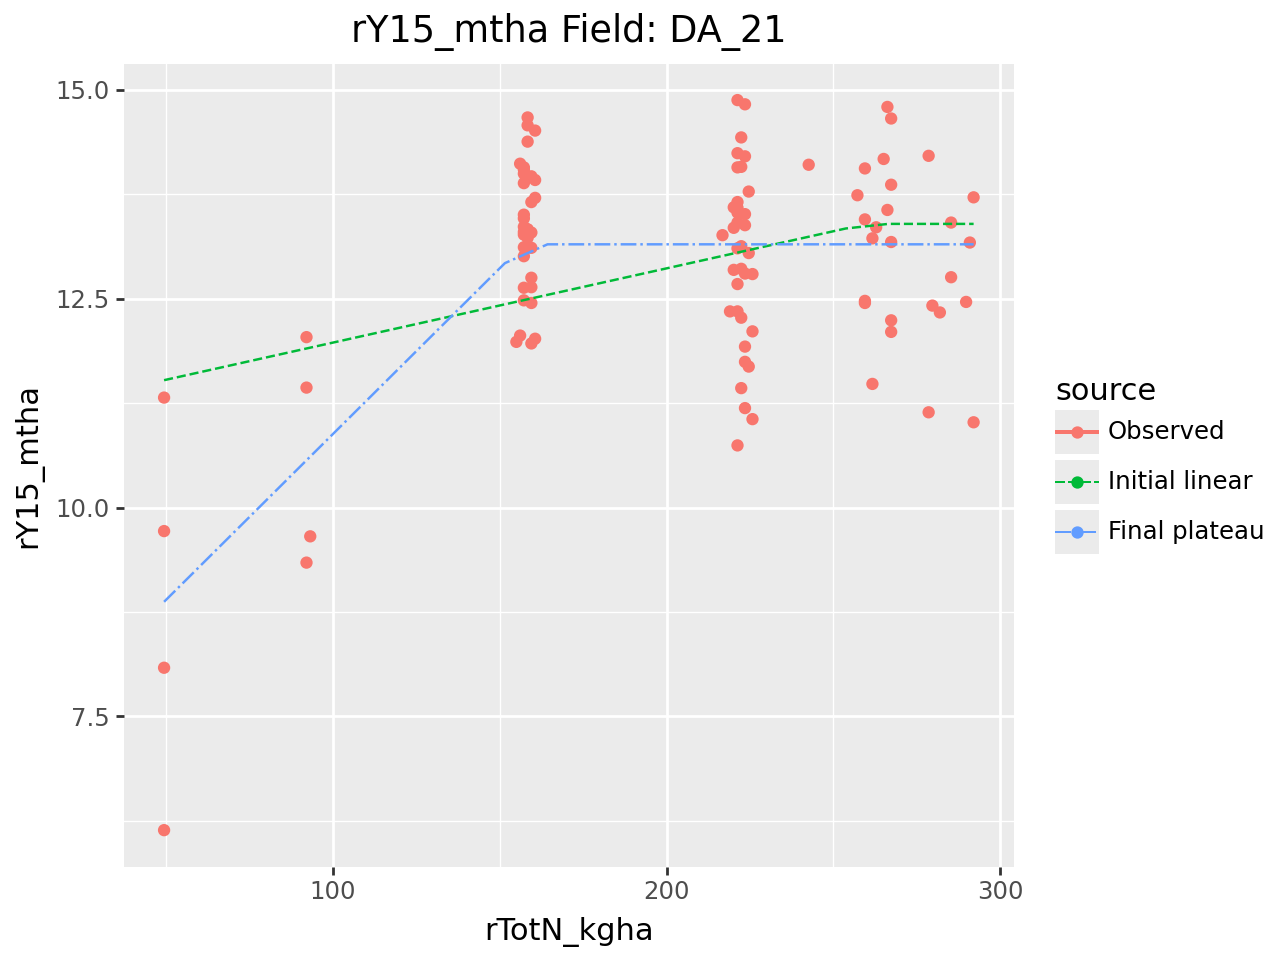

{'b0': np.float64(6.910966691671707), 'b1': np.float64(0.039675256994795155), 'x_break': np.float64(157.24862743953952), 'y_plateau': np.float64(13.149846397414233), 'r2': np.float64(0.46797855707652625), 'rmse': np.float64(1.006431215027438), 'aic': np.float64(7.346230830994519)}


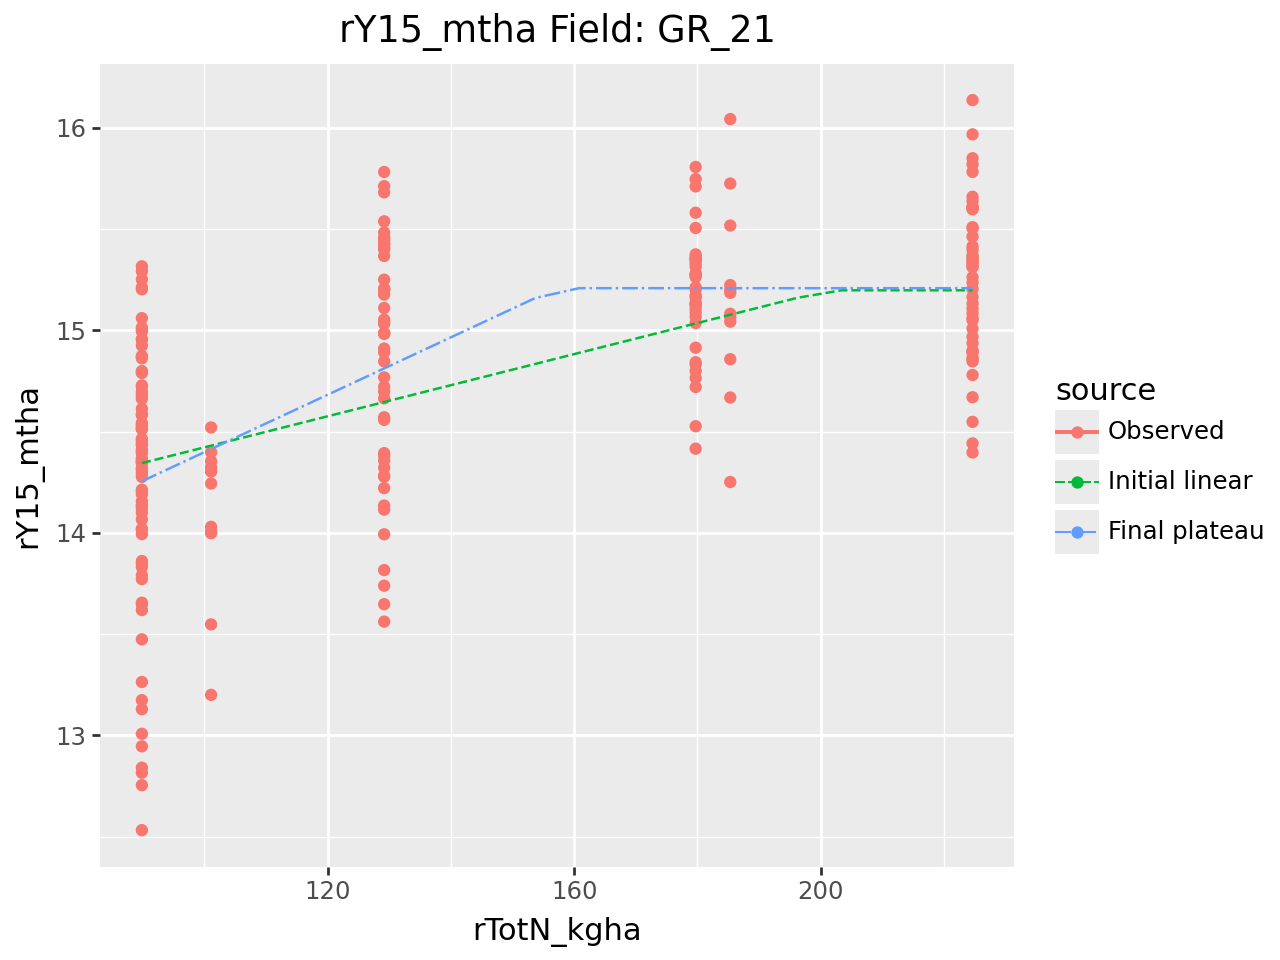

{'b0': np.float64(12.981645701285078), 'b1': np.float64(0.014164787621372632), 'x_break': np.float64(157.123563625673), 'y_plateau': np.float64(15.207267610355967), 'r2': np.float64(0.3928122103347269), 'rmse': np.float64(0.5208594955197979), 'aic': np.float64(-299.26467936271285)}


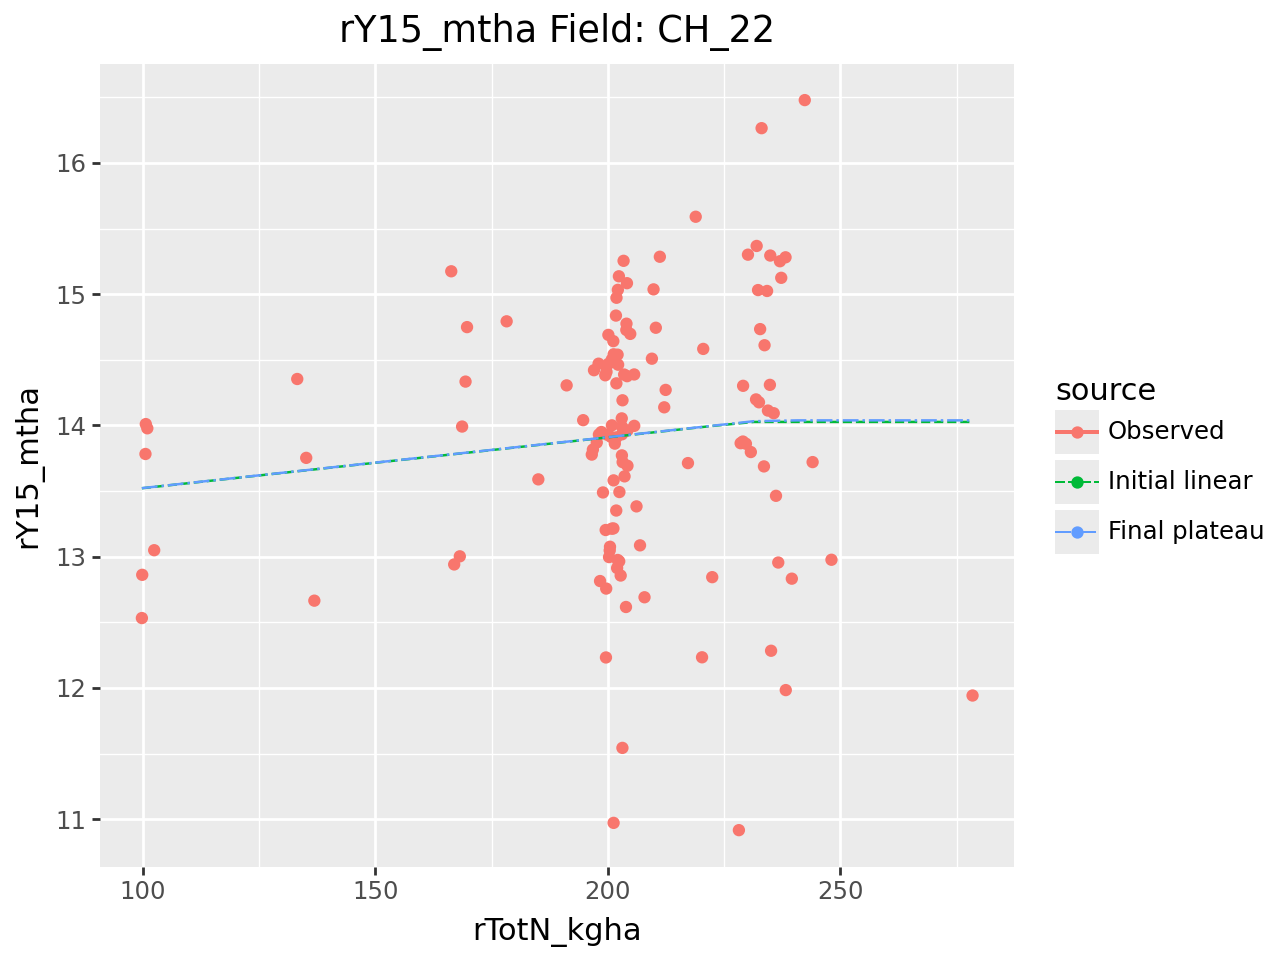

{'b0': np.float64(13.135722795559454), 'b1': np.float64(0.003874145807574281), 'x_break': np.float64(233.06988295499818), 'y_plateau': np.float64(14.038669505481389), 'r2': np.float64(0.022401973513169637), 'rmse': np.float64(0.9518458322464901), 'aic': np.float64(-6.732867141319957)}


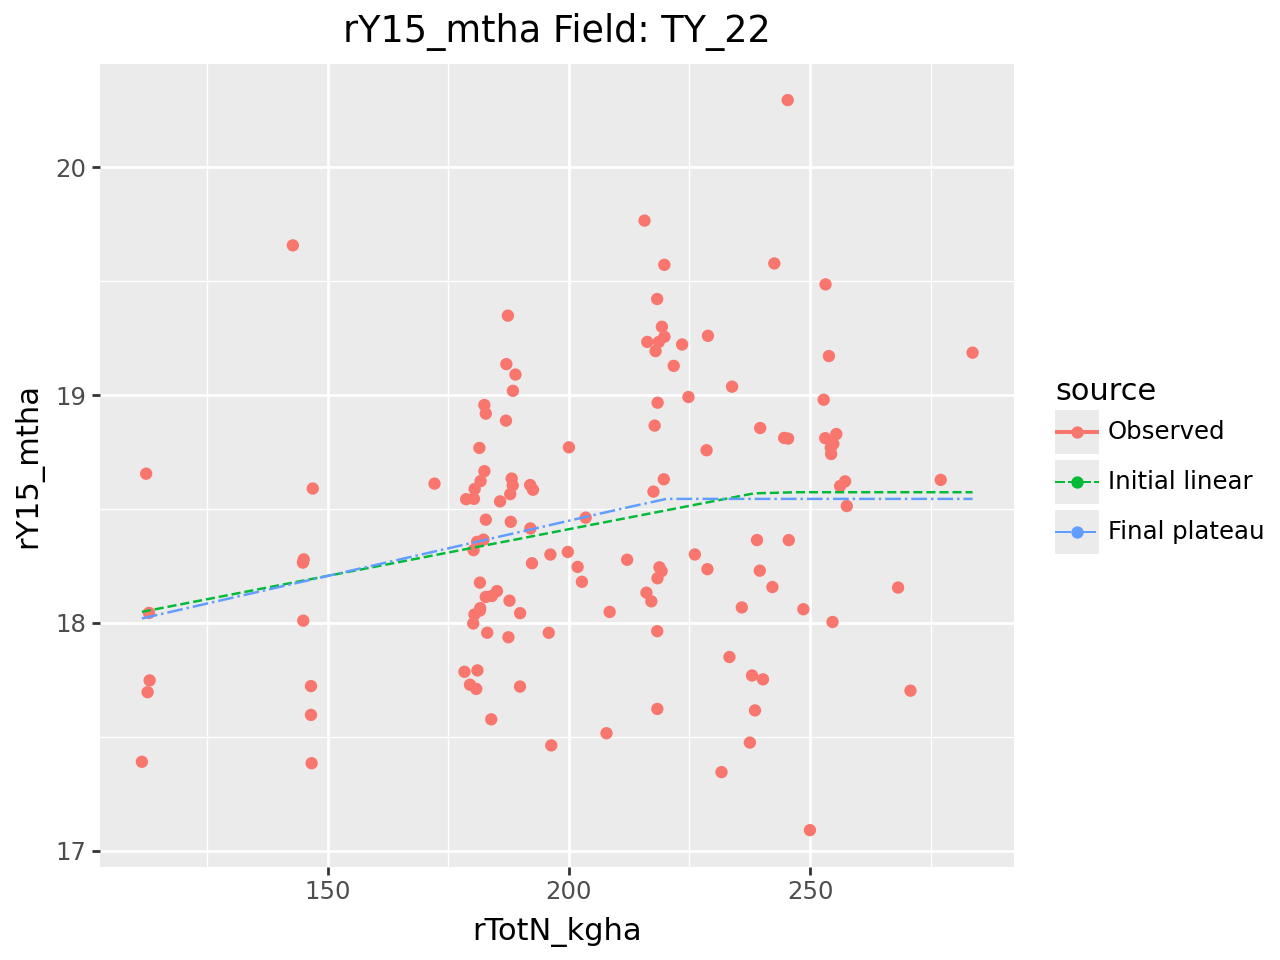

{'b0': np.float64(17.478855191214443), 'b1': np.float64(0.004845991529563106), 'x_break': np.float64(219.8088802826093), 'y_plateau': np.float64(18.54404716318672), 'r2': np.float64(0.07667739587522737), 'rmse': np.float64(0.5600530707011534), 'aic': np.float64(-144.72816996485247)}


/workspace/workflow/_9GTDpreparation/fit_curves.py:72: OptimizeWarning: Covariance of the parameters could not be estimated
/workspace/workflow/_9GTDpreparation/fit_curves.py:86: UserWarning: x_break (382.82) outside observed range.


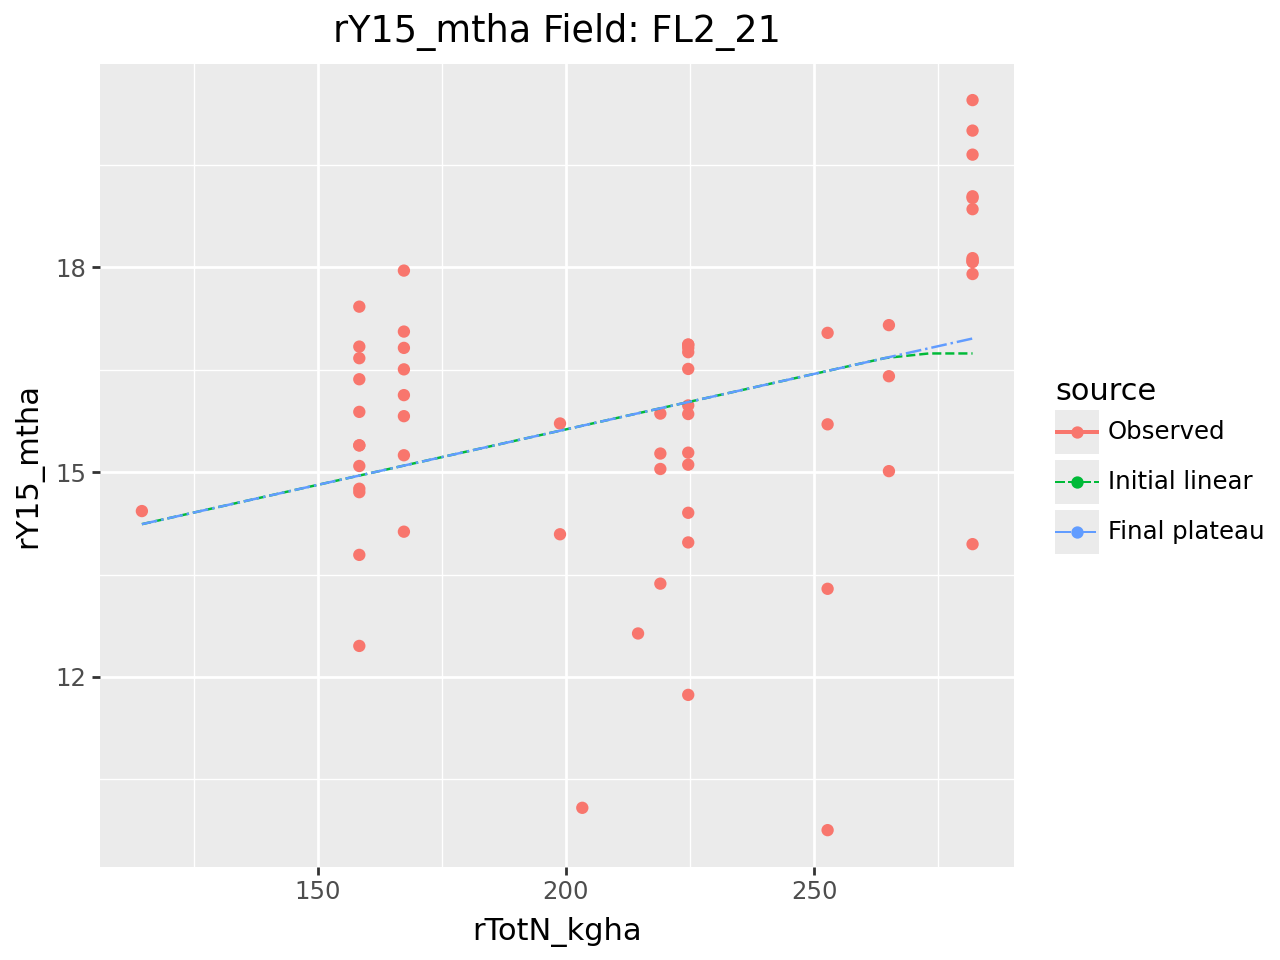

{'b0': np.float64(12.37582937366344), 'b1': np.float64(0.016249120823032814), 'x_break': np.float64(382.8215510435831), 'y_plateau': np.float64(18.596343010231443), 'r2': np.float64(0.12973053026739745), 'rmse': np.float64(2.0000977437160166), 'aic': np.float64(89.18352614685159)}


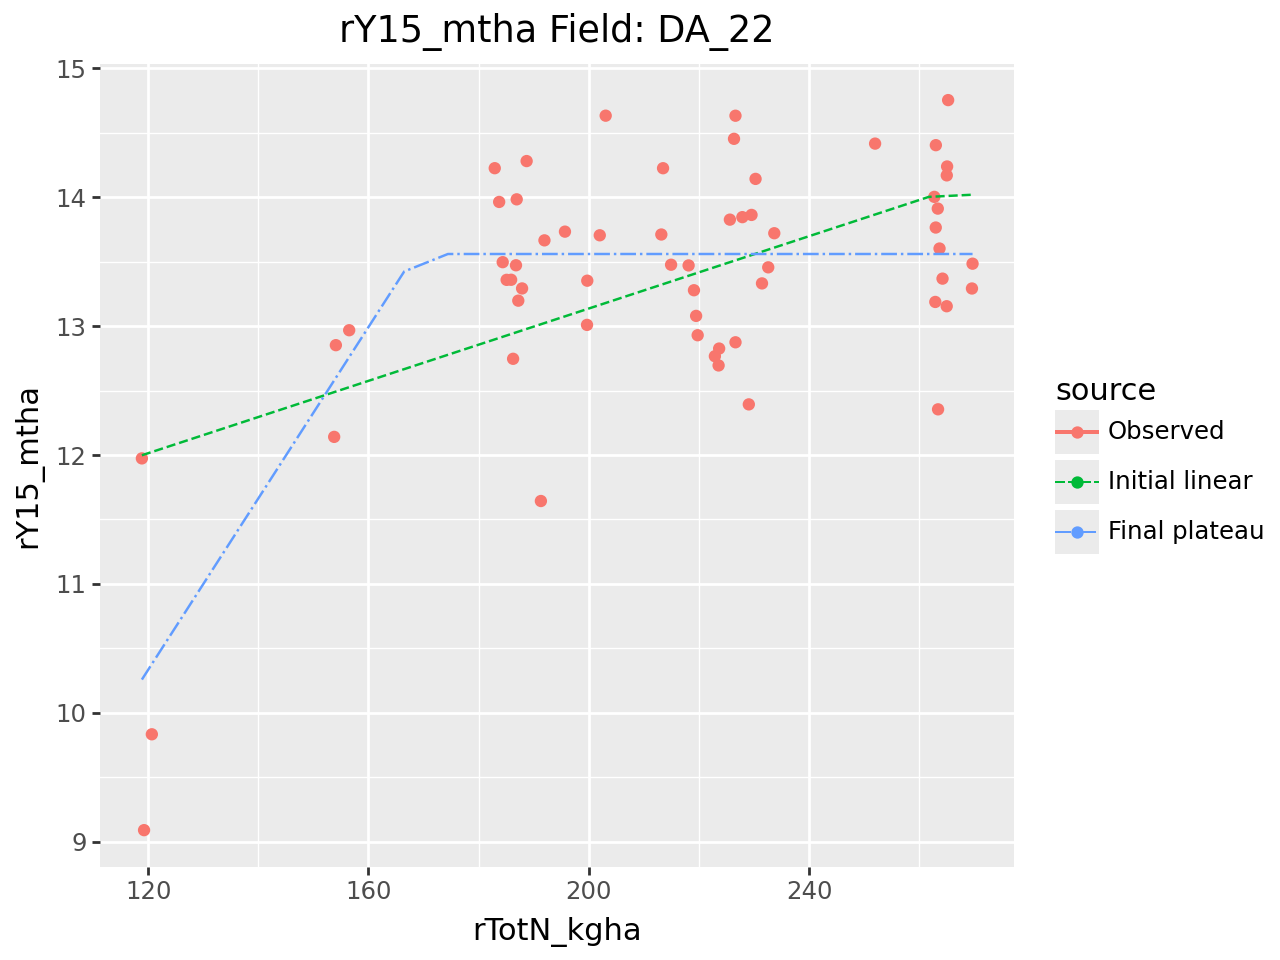

{'b0': np.float64(2.3534946515722477), 'b1': np.float64(0.06649793416320281), 'x_break': np.float64(168.5277489319872), 'y_plateau': np.float64(13.560241804724305), 'r2': np.float64(0.5496139879918231), 'rmse': np.float64(0.657973841534216), 'aic': np.float64(-44.23081235451862)}


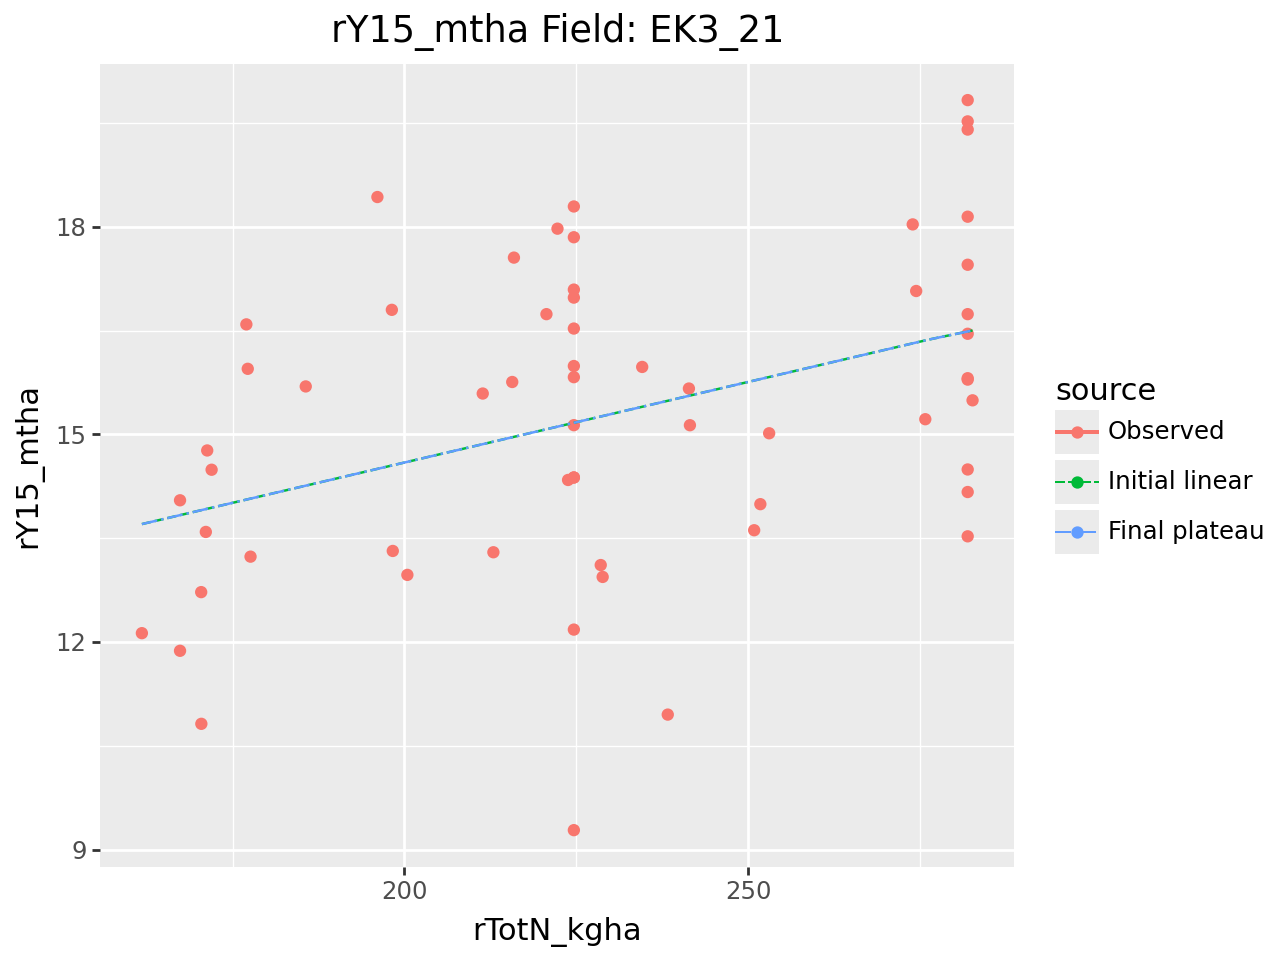

{'b0': np.float64(9.934111158770145), 'b1': np.float64(0.023298039220430666), 'x_break': np.float64(281.92434090909086), 'y_plateau': np.float64(16.50239551046421), 'r2': np.float64(0.16324692511361683), 'rmse': np.float64(2.0282257536376216), 'aic': np.float64(90.85936774743048)}


In [216]:
warnings.filterwarnings('ignore', category=PlotnineWarning)

gtd2 = pd.read_excel('NRCS_N_project_Indiana_dataset_2025.04.17_CSV.xlsx',sheet_name='Data',header=3)
# Filtering rows
gtd2=gtd2[gtd2['PreCrop']=='Soybean']
# Selecting Columns 
gtd2=gtd2[['County','Year','FieldID','rTotN_kgha','rY15_mtha']]
gtd2 = gtd2.sort_values('rTotN_kgha')
for i in gtd2['FieldID'].unique():
    subdf=gtd2[(gtd2['FieldID']==i)]
    print(fit_linear_plateau(group_df=subdf, y_var='rY15_mtha', x_var="rTotN_kgha", min_points=5))